# CS 136 day02 Lab: Bernoulli distributions and ML estimation


## Outline

* **Part 1: Numerical experiments with probabilities**
* **Part 2: Numerical experiments with logarithms of probabilities**

* **Part 3: Different ways to implement the Bern likelihood in NumPy**
* * Compare correctness
* * Compare speed
* * Compare NaN issues

* **Part 4: Visualizing the Bern likelihood as a function of $\mu$**
* **Part 5: Visualizing and Maximizing the Bern likelihood under alternative parameterization**

## Takeaways

* Try to work in log-space whenever taking products of many probabilities
* Vectorization of Python code matters a lot to get good speed
* Avoiding not-a-number (NaN) issues require careful thought
* Maximum likelihood optimization can be done via numerical grid search as well as by calculus
* Visualization is an excellent way to understand the behavior of distributions


In [ ]:
import numpy as np
import scipy.stats
import time
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Part 1: Numerical explorations

Let's imagine we observe a dataset of $N$ bits (each binary bit is 0 or 1).

The bits seem to be randomly generated.

We'd like to compute the probability of all the observed values, $x_1, \ldots x_N$.

If we assume each bit is the outcome of an independent Bernoulli r.v. with the same (shared) parameter $\mu$, we can compute this as

$$
p( x_1, \ldots x_N) = \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}
$$

using the standard PMF of the Bernoulli

This is getting complex, so let's simplify by assuming that our model is good, and it allocates 0.9 probability to each of the $x_n$ events that are observed.

Our simplified calculation is now:

\begin{align}
p( x_1, \ldots x_N) &\approx \prod_{n=1}^N 0.9
\\
&\approx 0.9^N
\end{align}

Can we compute this easily?

Let's look at several ways we could calculate $0.9^N$

In [ ]:
pt9 = np.asarray(0.9, np.float32)

### Option a: Use star-star operator (**)

In [ ]:
for N in [100, 1000, 10000, 100000]:
    print(pt9 ** N)

2.656132852400217e-05
1.7478249495597477e-46
0.0
0.0


### Option b: use np.power to compute

In [ ]:
for N in [100, 1000, 10000, 100000]:
    print(np.power(pt9, N))

2.656132852400217e-05
1.7478249495597477e-46
0.0
0.0


### Option c: Repeat the product N times

In [ ]:
for N in [100, 1000, 10000, 100000]:
    array_of_pt9_N = pt9 * np.ones(N, dtype=np.float32)
    print(np.prod(array_of_pt9_N))

2.6561329e-05
6e-45
6e-45
6e-45


## Discussion 1a: What's going on here?

What problems do you notice? Why do they occur?

Note that mathematically, it should always be true that if N < M, then 0.9^N > 0.9^M. 

> TODO discuss!

## Exercise 1b: What would change if you used float64 instead of float32 precision?

Try it out!

> TODO try and discuss!

## Discussion 1c: What are the practical takeaways of the numerical issues here?

If you were to be analyzing large datasets (with 1000s and 1000s of entries), can we assign each one a "probability" between 0 and 1 and ask about joint probabilities by taking products?


> TODO discuss!

# Part 2: Numerical explorations with log


Now we'll consider tracking the *natural log* of probability above

\begin{align}
\log \left[ p( x_1, \ldots x_N)  \right] &\approx \log \left[ \prod_{n=1}^N 0.9 \right]
\\
&= \sum_{n=1}^N \log 0.9 = N \log 0.9
\end{align}

Let's try it for various values of $N$

In [ ]:
for N in [100, 1000, 10000, 100000]:
    print(N * np.log(pt9))

-10.536054521799088
-105.36054521799088
-1053.6054521799088
-10536.054521799088


## Discussion 2a: What's going on here?

Do you see the same problems as in Discussion 1a?

Note that mathematically, it should always be true that if N < M, then $\log(0.9^N) > \log(0.9^M)$

> TODO discuss!

## Discussion 2b: What are the practical takeaways of the numerical issues here?

If you were to be analyzing large datasets (with 1000s and 1000s of entries), which should we look at:
    
* $p( x_1, \ldots x_N)$
* $\log p( x_1, \ldots x_N)$



> TODO discuss!

# Part 3: Computing the log likelihood of a Bernoulli

Two ways to write the formula for a Bernoulli's log PMF mathematically

\begin{align}
\log p( x | \mu) &= \begin{cases}
\log \mu & ~\text{if}~ x =1
\\
\log (1-\mu) & ~\text{if}~ x =0
\end{cases} && \text{"A: Select case only"}
\\
&= x \log \mu + (1-x) \log (1-\mu) && \text{"B: Weighted product of cases"}
\end{align}

Now, while these are equivalent mathematically, they may each have different properties when implemented in code.

## Discussion 3a: Pros / Cons

What do you suggest are the pros and cons of implementing each of the two views of the formula above?

> TODO discuss!

## Implementations with forloop

We'll first implement formulas A and B using for loops to traverse a large dataset of size $N$

TODO: You try to edit the FIXME lines below.

In [ ]:
def calc_bern_log_pmf__A_forloop(x_N, mu):
    ''' Compute bernoulli log PMF of dataset at given parameter
    
    Args
    ----
    x_N : 1D array of type int32
        Contains binary values
    mu : scalar float, between 0.0 and 1.0
        Probability of the positive outcome in Bern model
        
    Returns
    -------
    logpmf : scalar float
        Log probability of the entire dataset of N points
    '''
    logpmf = 0.0
    N = x_N.size
    for n in range(N):
        if x_N[n] == 1:
            logpmf += 0.0 # TODO FIXME
        else:
            logpmf += 0.0 # TODO FIXME
    return logpmf

In [ ]:
def calc_bern_log_pmf__B_forloop(x_N, mu):
    ''' Compute bernoulli log PMF of dataset at given parameter
    
    Args
    ----
    x_N : 1D array of type int32
        Contains binary values
    mu : scalar float, between 0.0 and 1.0
        Probability of the positive outcome in Bern model
        
    Returns
    -------
    logpmf : scalar float
        Log probability of the entire dataset of N points
    '''
    logpmf = 0.0
    N = x_N.size
    for n in range(N):
        logpmf += np.log(mu) # TODO FIXME
    return logpmf

## Implementations with vectorization

We'll now implement formulas A and B using **vectorized** numpy code for a dataset of size $N$.

This code has NO PYTHON-LEVEL LOOPS. Instead, the work done in the "loop" is performed in compiled routines like `np.sum`, so that the work is done very fast.

There's no TODOs here.

In [ ]:
def calc_bern_log_pmf__A_vectorized(x_N, mu):
    ''' Compute bernoulli log PMF of dataset at given parameter
    
    Args
    ----
    x_N : 1D array of type int32
        Contains binary values
    mu : scalar float, between 0.0 and 1.0
        Probability of the positive outcome in Bern model
        
    Returns
    -------
    logpmf : scalar float
        Log probability of the entire dataset of N points
    '''
    count1 = np.sum(x_N==1)
    count0 = np.sum(x_N==0)
    logpmf = 0.0
    if count1 > 0:
        logpmf += count1 * np.log(mu) 
    if count0 > 0:
        logpmf += count0 * np.log(1-mu)
    return logpmf

In [ ]:
def calc_bern_log_pmf__B_vectorized(x_N, mu):
    ''' Compute bernoulli log PMF of dataset at given parameter
    
    Args
    ----
    x_N : 1D array of type int32
        Contains binary values
    mu : scalar float, between 0.0 and 1.0
        Probability of the positive outcome in Bern model
        
    Returns
    -------
    logpmf : scalar float
        Log probability of the entire dataset of N points
    '''
    logpmf = np.sum(x_N * np.log(mu) + (1-x_N) * np.log(1-mu))
    return logpmf

## Example 3b: Verify correctness of these implementations with "typical" inputs


Let's ask each of the 4 functions above for the logpmf of the same dataset with same mu value.

We should observe the *same* logpmf return value if the 4 implementations are each correct.

### Verify correctness with N=20 and mu = 0.5


In [ ]:
x_N = np.random.choice(2, size=20)
mu = 0.5

print("x_N:" + str(x_N))

formula_types = ['A', 'B']
loop_types = ['forloop', 'vectorized']
for loop in loop_types:
    for formula in formula_types:
        # ask Python for the function in local workspace with the provided name
        calc_bern_log_lik = locals()['calc_bern_log_pmf__%s_%s' % (formula, loop)]
        print(calc_bern_log_lik(x_N, mu), calc_bern_log_lik.__name__)

x_N:[1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1]
0.0 calc_bern_log_pmf__A_forloop
-13.862943611198906 calc_bern_log_pmf__B_forloop
-13.862943611198904 calc_bern_log_pmf__A_vectorized
-13.862943611198906 calc_bern_log_pmf__B_vectorized


### Verify correctness with N=30 and mu = 0.345

In [ ]:
x_N = np.random.choice(2, size=30)
mu = 0.345

print("x_N:" + str(x_N))

formula_types = ['A', 'B']
loop_types = ['forloop', 'vectorized']
for loop in loop_types:
    for formula in formula_types:
        # ask Python for the function in local workspace with the provided name
        calc_bern_log_lik = locals()['calc_bern_log_pmf__%s_%s' % (formula, loop)]
        print(calc_bern_log_lik(x_N, mu), calc_bern_log_lik.__name__)

x_N:[1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0]
0.0 calc_bern_log_pmf__A_forloop
-31.926325858523306 calc_bern_log_pmf__B_forloop
-18.46341866784158 calc_bern_log_pmf__A_vectorized
-18.463418667841577 calc_bern_log_pmf__B_vectorized


## Discussion 3b: Did our correctness tests pass?

> TODO discuss

## Example 3c: Assess speed of each implementation on large datasets

We'll take the median of 30 trials for each function, to be sure that we get "typical" timing not an outlier.

In [ ]:
n_trials = 30
N = 10000

x_N = np.random.choice(2, size=N)
mu = 0.345

print("x_N:" + str(x_N))

formula_types = ['A', 'B']
loop_types = ['forloop', 'vectorized']
for loop in loop_types:
    for formula in formula_types:
        # ask Python for the function in local workspace with the provided name
        calc_bern_log_lik = locals()['calc_bern_log_pmf__%s_%s' % (formula, loop)]
        
        runtimes_in_millisec = list()
        for rep in range(n_trials):
            start_time_millisec = time.time() * 1000
            ans = calc_bern_log_lik(x_N, mu)
            elapsed_time_millisec = time.time() * 1000 - start_time_millisec
            runtimes_in_millisec.append(elapsed_time_millisec)
            
        time_str = "% 11.3f milliseconds" % (np.median(runtimes_in_millisec))
        print(time_str, calc_bern_log_lik.__name__)

x_N:[0 1 1 ... 1 0 0]
      1.397 milliseconds calc_bern_log_pmf__A_forloop
      6.890 milliseconds calc_bern_log_pmf__B_forloop
      0.030 milliseconds calc_bern_log_pmf__A_vectorized
      0.037 milliseconds calc_bern_log_pmf__B_vectorized


## Discussion 3c: Are these timing results what you expect? How much faster is vectorized code?

> TODO discuss

## Example 3d: Testing edgecases for numerical correctness

Look at the two test inputs below.

Which of the 4 implementations are correct for each edge case?


In [ ]:
x_N = np.asarray([1, 1, 1, 1], dtype=np.int32)
mu = 1.0

print("x_N:" + str(x_N))

formula_types = ['A', 'B']
loop_types = ['forloop', 'vectorized']
for loop in loop_types:
    for formula in formula_types:
        # ask Python for the function in local workspace with the provided name
        calc_bern_log_lik = locals()['calc_bern_log_pmf__%s_%s' % (formula, loop)]
        print(calc_bern_log_lik(x_N, mu), calc_bern_log_lik.__name__)

x_N:[1 1 1 1]
0.0 calc_bern_log_pmf__A_forloop
0.0 calc_bern_log_pmf__B_forloop
0.0 calc_bern_log_pmf__A_vectorized
nan calc_bern_log_pmf__B_vectorized


In [ ]:
x_N = np.asarray([0, 0, 1], dtype=np.int32)
mu = 0.0

print("x_N:" + str(x_N))

formula_types = ['A', 'B']
loop_types = ['forloop', 'vectorized']
for loop in loop_types:
    for formula in formula_types:
        # ask Python for the function in local workspace with the provided name
        calc_bern_log_lik = locals()['calc_bern_log_pmf__%s_%s' % (formula, loop)]
        print(calc_bern_log_lik(x_N, mu), calc_bern_log_lik.__name__)

x_N:[0 0 1]
0.0 calc_bern_log_pmf__A_forloop
-inf calc_bern_log_pmf__B_forloop
-inf calc_bern_log_pmf__A_vectorized
nan calc_bern_log_pmf__B_vectorized


## Discussion 3d: Edgecase analysis

Which answers are correct? Why?

> TODO discuss

## Discussion 3e: Edge cases in practice?

Are the nans we saw in 3d something to worry about in a real application? How could you avoid this?

> TODO discuss

# Part 4: Visualizing the likelihood as a function of parameter $\mu$ 

## Draw fake data from our model

In [ ]:
# Define a random generator object, with specific seed for reproducibility
prng = np.random.RandomState(101)

# Settings
N = 100000   # num bit values to observe

# Pick a "true" mu value for data generation
true_mu = 0.789

# Sample N examples from Bernoulli given mu
x_N = scipy.stats.bernoulli(true_mu).rvs(size=N, random_state=prng)
# OR...
# x_N = prng.rand(N) < true_mu # another equivalent way to draw N samples from a Bernoulli with parameter 'true_mu'

In [ ]:
# Print first 20 values of data...
x_N[:20]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

## Plot of likelihood PMF value as a function of parameter mu

We'll make a separate plot as we see more and more data (1 bit, 3 bits, 10 bits, ...)

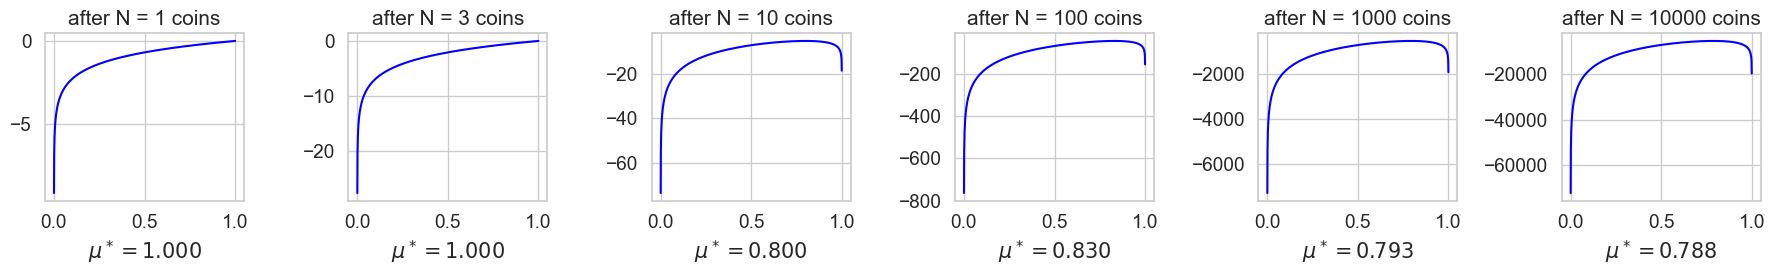

In [ ]:
Npartial_list = [1, 3, 10, 100, 1000, 10000]
L = len(Npartial_list)

fig, axgrid = plt.subplots(
    nrows=1, ncols=L,
    sharex=True, sharey=False,
    figsize=(3 * L, 3))

# Define a grid of mu values at which we'll evaluate the likelihood
G = 1001
mu_grid_G = np.linspace(0.0001, 0.9999, G)

for aa, Npartial in enumerate(Npartial_list):

    log_lik_G = np.zeros(G)
    for gg in range(G):
        log_lik_G[gg] = calc_bern_log_pmf__A_vectorized(x_N[:Npartial], mu_grid_G[gg])
                                    
    axgrid[aa].plot(mu_grid_G, log_lik_G, 'b-')
    axgrid[aa].set_title("after N = %d coins" % Npartial)

    ggstar = np.argmax(log_lik_G)
    mustar = mu_grid_G[ggstar]
    axgrid[aa].set_xlabel(r"$\mu^* = %.3f$" % mustar)
    
plt.tight_layout();

## Discussion 4a: Analyze your visuals

What do you notice about the plots above as the number of observed coins $N$ increases?

What happens to the shape of the curve?
What happens to the y-axis scale? 

> TODO discuss

## Discussion 4b: How to find the maximum?

In the notes, we discussed how we can use calculus to solve for the "maximum likelihood" value of $\mu$.

Above, however, we used a different procedure (see the line `mustar = ...`). What is this procedure? How does it work? 

What are the pros/cons of the procedure above vs. the calculus procedure?

> TODO discuss

# Part 5: Alternative parameterization using sigmoid of a real value

Let $r \in \mathbb{R}$ be an UNCONSTRAINED real value parameter

Define the sigmoid function as the S-shaped function that maps any $r$ value to between 0.0 and 1.0

$$
\sigma(r) = \frac{1}{1 + e^{-r}}
$$

We visualize this function below

In [ ]:
from scipy.special import expit as sigmoid # use a convenient implementation already in scipy

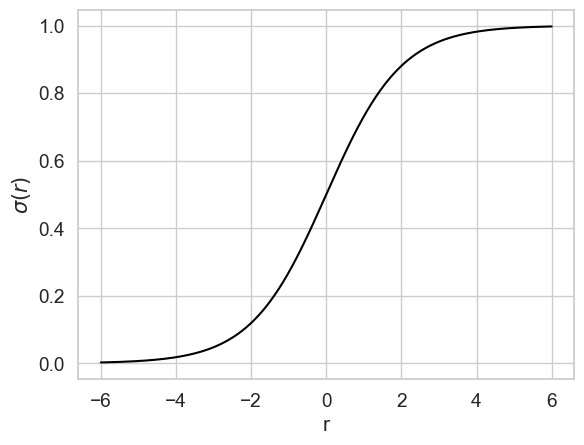

In [ ]:
r_grid_G = np.linspace(-6, +6, G)

plt.plot(r_grid_G, sigmoid(r_grid_G), 'k-');
plt.xlabel('r')
plt.ylabel('$\sigma(r)$');


Let's consider a model for our $N$ coins that looks like this

$$
p( x_1, \ldots x_N) = \prod_{n=1}^N \text{BernPMF}( x_n | \sigma(r) )
$$

We can visualize the likelihood as a function of $r$ for the same fake dataset as in part 4.

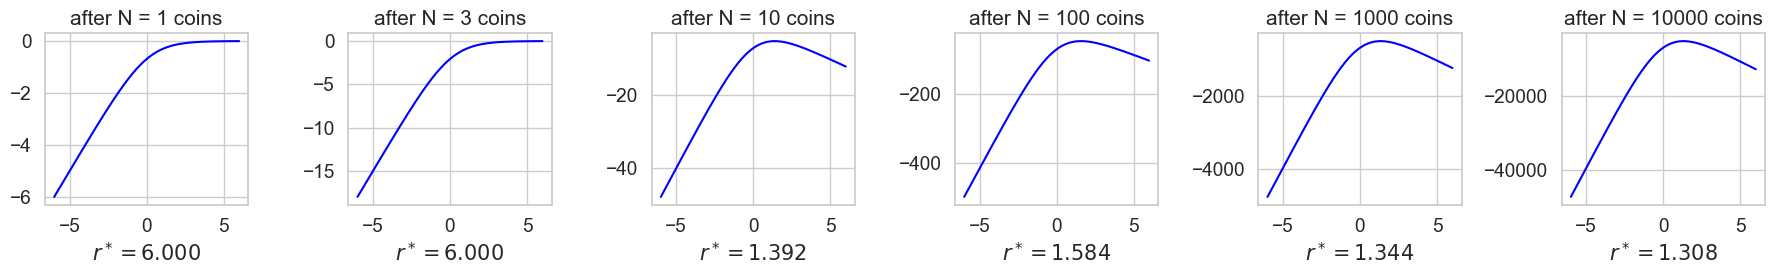

In [ ]:
L = len(Npartial_list)

fig, axgrid = plt.subplots(
    nrows=1, ncols=L,
    sharex=True, sharey=False,
    figsize=(3 * L, 3))

for aa, Npartial in enumerate(Npartial_list):

    log_lik_G = np.zeros(G)
    for gg in range(G):
        proba_from_r_gg = sigmoid(r_grid_G[gg])
        log_lik_G[gg] = calc_bern_log_pmf__A_vectorized(
            x_N[:Npartial], proba_from_r_gg)
                                    
    axgrid[aa].plot(r_grid_G, log_lik_G, 'b-')
    axgrid[aa].set_title("after N = %d coins" % Npartial)

    ggstar = np.argmax(log_lik_G)
    rstar = r_grid_G[ggstar]
    axgrid[aa].set_xlabel(r"$r^* = %.3f$" % rstar)
    
plt.tight_layout();

## Discussion 5a: Is the ML estimate the same before and after reparameterization?

One of the key advantages of ML estimation is that you won't get meaningfully different answers depending on how you choose to parameterize the problem.

Is this seen in practice here? What might account for the subtle differences?

> TODO discuss